In [202]:
from sympy import LeviCivita
import numpy as np
eps = np.array([[[ float(LeviCivita(i,j,k)) for k in range(3)] for j in range(3)] for i in range(3)])

In [204]:
from sympy.physics.paulialgebra import Pauli, evaluate_pauli_product
from sympy import I

In [211]:
import numpy as np
import cmath

#Defining spin matrices

sig_x = np.array([[0, 1], [1, 0]])
sig_y = np.array([[0, complex(0, -1)], [complex(0, 1), 0]])
sig_z = np.array([[1, 0], [0, -1]])
spin_matrix = [sig_x, sig_y, sig_z]
up_z = np.array([[1], [0]])
down_z = np.array([[0], [1]])

The below code generates all combinations of the following:

$(1, 0) \sigma_k \left( \begin{matrix} 1 \\ 0 \end{matrix} \right)$

etc.

In [225]:
#Defining all matrix elements of spin matrix

def up_up(k):
    return up_z.T.dot(spin_matrix[k-1].dot(up_z))
def up_down(k):
    return up_z.T.dot(spin_matrix[k-1].dot(down_z))
def down_down(k):
    return down_z.T.dot(spin_matrix[k-1].dot(down_z))
def down_up(k):
    return down_z.T.dot(spin_matrix[k-1].dot(up_z))

The quantities below are defined as classes so that they can be input into the sympy Sum() function. 

In [241]:
import numpy as np
import cmath
from sympy import LeviCivita
from sympy import *
from sympy import poly
from sympy.abc import x 
from sympy.core.numbers import Integer as SympyInteger 
from sympy.solvers import solve
from sympy import symbols, IndexedBase, Idx

import sys
sys.setrecursionlimit(10**5)

#Defining method of actually plugging in all of the above functions to get the total sum

class up_up_plugin(Function):
    @classmethod
    def eval(cls, x):
        # !! Not actually a good eval() method !!
        if isinstance(x, Integer):
            return complex(up_up(x))
        
class up_down_plugin(Function):
    @classmethod
    def eval(cls, x):
        # !! Not actually a good eval() method !!
        if isinstance(x, Integer):
            return complex(up_down(x))
        
class down_up_plugin(Function):
    @classmethod
    def eval(cls, x):
        # !! Not actually a good eval() method !!
        if isinstance(x, Integer):
            return complex(down_up(x))
        
class down_down_plugin(Function):
    @classmethod
    def eval(cls, x):
        # !! Not actually a good eval() method !!
        if isinstance(x, Integer):
            return complex(down_down(x))

#A vector of all matrix elements of a given spin matrix sigma_k:
        
def total_states(k, i):
    A = (up_up_plugin(k), up_down_plugin(k), down_up_plugin(k), down_down_plugin(k))
    return A[i]

#Using the below to actually plug the total_states function into the sum:
        
class total_states_plugin(Function):
    @classmethod
    def eval(cls, k, i):
        # !! Not actually a good eval() method !!
        if isinstance(i, Integer) and isinstance(k, Integer):
            return total_states(k, i)

from sympy import cos, sin

In [250]:
#Normalized momentum transfer vector

class n(Function):
    @classmethod
    def eval(cls, i):
        # !! Not actually a good eval() method !!
        if isinstance(i, Integer):
            i = i - 1
            if i == 0:
                return sin(theta) * cos(phi)
            if i == 1:
                return sin(theta) * sin(phi)
            if i == 2:
                return cos(theta)

The below cell computes the following:

$1/4 \sum_{a, b} \left| \sum_{i, j, k, t, m, l} \epsilon_{t, m, l} \epsilon_{l, j, k}  n_m n_j A_{k, a} A_{t, b} \right|^2$

where $A_k = (\bra{+}\sigma_k \ket{+}, \bra{+}\sigma_k \ket{-}, \bra{-}\sigma_k \ket{+}, \bra{-}\sigma_k \ket{-})$.

Using $A_{k, a}$ allows to sum over all spin combinations in the outer sum.

In [266]:
theta, phi = symbols('theta phi')
a, b, i, j, k, t, m, l = symbols('a b i j k t m l')

#Computing sum

A = Sum(total_states_plugin(k, a) * total_states_plugin(t, b) * n(m) * n(j) * LeviCivita(t, m, l) * LeviCivita(l, j, k), (t, 1, 3), (m, 1, 3), (l, 1, 3), (j, 1, 3), (k, 1, 3)).doit()
B = Sum ((1/4) * A**2, (a, 0, 3), (b, 0, 3)).doit() #Averaging and summing over initial states, and squaring total
simplify(B).doit()

4.0*sin(phi)**4*sin(theta)**4 - 4.0*sin(phi)**2*sin(theta)**2 + 2.0

Take the differential cross section for low energies (below the greatest electron binding energy) and for each shell, multiply by a factor of (total number of electrons in shell)/(total bound electrons), but first transform $d \sigma / d \Omega$ to $d \sigma / d E_r$.

Transforming to energy differential cross section:

$\frac{d \sigma}{d E_r} = \frac{d\sigma}{d\Omega} \frac{d\Omega}{dE_r}$ = $\frac{2 m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2} \frac{d \Omega}{dE_r}$

Start with the following:

$E_r = \frac{2m_n m_e}{(m_n + m_e)^2}(1 - \cos(\theta_{cm})$


Differentiating and multiplying by $\sin(\theta_{cm}) d\phi$:

$\rightarrow \sin(\theta_{cm}) d\phi dE_r = \frac{2m_n m_e}{(m_n + m_e)^2} \sin(\theta_{cm}) d\Omega$

So,

$ \frac{d\Omega}{dE_r} = \frac{(m_n + m_e)^2}{2m_n m_e \sin(\theta_{cm})} d\phi$

What to do about $d\phi$??

In [107]:
mu_B = 9.274E-21
gamma_N = -1.832E10
m_N = 1.675E-24
m_e = 9.109E-28
E = 1E6
hbar = 1.054E-27

amplitude = (m_N + m_e)**2 * m_N**2 * gamma_N**2 * mu_B**2 * E / (m_N * m_e * hbar**2)

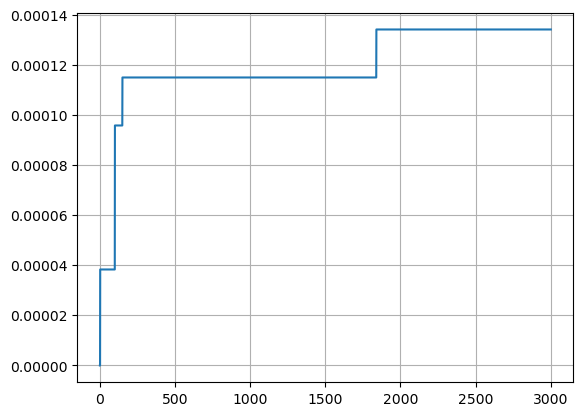

In [113]:
import matplotlib.pyplot as plt
import numpy as np

shell_energies = np.array([1.12, 99.2, 150, 1839])
electron_number = np.array([4, 6, 2, 2])
total_e = 14

def cross_section(energy, shell_energies, electron_number):
    cross_section = 0
    if energy < shell_energies[0]:
        cross_section = 0 / total_e
    if energy >= shell_energies[-1:]:
        cross_section = sum(electron_number) / total_e
    for i in range(0, len(shell_energies)-1):
        if shell_energies[i] <= energy < shell_energies[i+1]:
            cross_section = sum(electron_number[:i+1]) / total_e
    cross_section *= amplitude
    return cross_section

energy_span = np.linspace(0, 3000, 3000)
y = []
for energy in energy_span:
    y.append(cross_section(energy, shell_energies, electron_number))
plt.plot(energy_span, y)
plt.grid()
plt.show()